In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from yellowbrick.classifier import ClassificationReport



import seaborn as sbn
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline


from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 1000)

In [3]:
#importing datasets
data = pd.read_csv('student-data.csv', delimiter = ',')

student_perf = pd.read_csv('student-mat.csv', delimiter = ';')

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


# Data Descriptive analysis

In [5]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [7]:
data.failures.unique()

array([0, 3, 2, 1], dtype=int64)

In [8]:
data.shape

(395, 31)

In [9]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [11]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


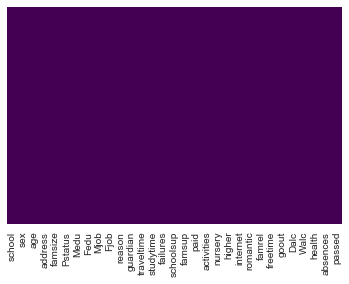

In [12]:
#visualize null_data
sbn.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Explotory  Data  Analysis 

In [13]:
#Percentage of students that pass

pass_students = len(data [data [ 'passed' ] == 'yes'])
fail_students= len(data[data['passed'] == 'no'])
no_student = len(data)

passed = (pass_students / no_student) * 100
failed = (fail_students/ no_student) * 100





print ('The total Number of students is: {}' .format(no_student))
print ('The failure rate is: {:.2f}%' .format(failed))

print ('The graduation rate is : {:.2f}%' .format(passed))

The total Number of students is: 395
The failure rate is: 32.91%
The graduation rate is : 67.09%


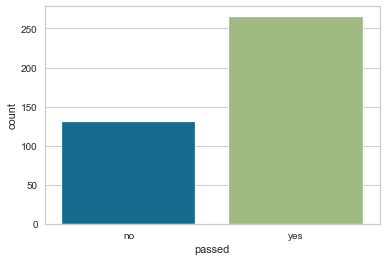

In [14]:
sbn.set_style('whitegrid')
sbn.countplot(x='passed', data = data)

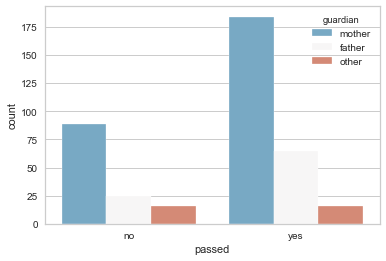

In [15]:
sbn.set_style( 'whitegrid' )
sbn.countplot ( x= 'passed', hue='guardian', data= data, palette= 'RdBu_r')

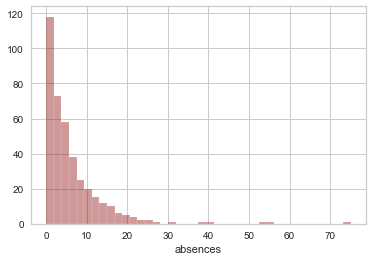

In [16]:
sbn.distplot ( data ['absences'], kde=False, color= 'darkred', bins = 40)

In [17]:
len(data.absences.unique())

34

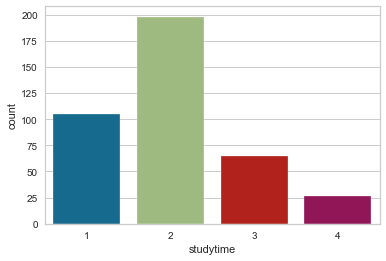

In [18]:
sbn.countplot (x='studytime', data = data)

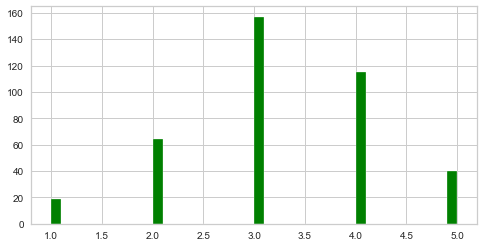

In [19]:
data['freetime'].hist( color = 'green', bins = 40, figsize = (8,4))

In [20]:
data.freetime.unique()

array([3, 2, 4, 1, 5], dtype=int64)

# Data Cleaning

In [21]:
data_tran = data
''''
x_columns = list(data.columns[:-1])
y_columns = data.columns[-1] 

x = data[x_columns]
y = data[y_columns] 
'''

"'\nx_columns = list(data.columns[:-1])\ny_columns = data.columns[-1] \n\nx = data[x_columns]\ny = data[y_columns] \n"

In [22]:
data_tran.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


In [23]:
data_tran['sex'] = pd.Categorical(data_tran['sex'], ['M', 'F'],
                                               ordered = True)
data_tran['sex'] = data_tran['sex'].cat.codes

data_tran['address'] = pd.Categorical(data_tran['address'], ['U', 'R'],
                                               ordered = True)
data_tran['address'] = data_tran['address'].cat.codes

data_tran['famsize'] = pd.Categorical(data_tran['famsize'], ['GT3', 'LE3'],
                                               ordered = True)
data_tran['famsize'] = data_tran['famsize'].cat.codes

data_tran['Pstatus'] = pd.Categorical(data_tran['Pstatus'], ['A', 'T'],
                                               ordered = True)
data_tran['Pstatus'] = data_tran['Pstatus'].cat.codes

data_tran['Mjob'] = pd.Categorical(data_tran['Mjob'], ['at_home', 'health', 'other', 'services', 'teacher'],
                                               ordered = True)
data_tran['Mjob'] = data_tran['Mjob'].cat.codes

data_tran['Fjob'] = pd.Categorical(data_tran['Fjob'], ['teacher', 'other', 'services', 'health', 'at_home'],
                                               ordered = True)
data_tran['Fjob'] = data_tran['Fjob'].cat.codes

data_tran['reason'] = pd.Categorical(data_tran['reason'], ['course', 'other', 'home', 'reputation'],
                                               ordered = True)
data_tran['reason'] = data_tran['reason'].cat.codes

data_tran['guardian'] = pd.Categorical(data_tran['guardian'], ['mother', 'father', 'other'],
                                               ordered = True)
data_tran['guardian'] = data_tran['guardian'].cat.codes

data_tran['schoolsup'] = pd.Categorical(data_tran['schoolsup'], ['yes', 'no'],
                                               ordered = True)
data_tran['schoolsup'] = data_tran['schoolsup'].cat.codes

data_tran['famsup'] = pd.Categorical(data_tran['famsup'], ['yes', 'no'],
                                               ordered = True)
data_tran['famsup'] = data_tran['famsup'].cat.codes


data_tran['paid'] = pd.Categorical(data_tran['paid'], ['yes', 'no'],
                                               ordered = True)
data_tran['paid'] = data_tran['paid'].cat.codes

data_tran['activities'] = pd.Categorical(data_tran['activities'], ['yes', 'no'],
                                               ordered = True)
data_tran['activities'] = data_tran['activities'].cat.codes

data_tran['nursery'] = pd.Categorical(data_tran['nursery'], ['yes', 'no'],
                                               ordered = True)
data_tran['nursery'] = data_tran['nursery'].cat.codes


data_tran['higher'] = pd.Categorical(data_tran['higher'], ['yes', 'no'],
                                               ordered = True)
data_tran['higher'] = data_tran['higher'].cat.codes

data_tran['internet'] = pd.Categorical(data_tran['internet'], ['yes', 'no'],
                                               ordered = True)
data_tran['internet'] = data_tran['internet'].cat.codes


data_tran['passed'] = pd.Categorical(data_tran['passed'], ['yes', 'no'],
                                               ordered = True)
data_tran['passed'] = data_tran['passed'].cat.codes



student_perf['sex'] = pd.Categorical(student_perf['sex'], ['M', 'F'], ordered = True)
student_perf['sex'] = student_perf['sex'].cat.codes

student_perf['school'] = pd.Categorical(student_perf['school'], ['GP', 'MS'], ordered = True)
student_perf['school'] = student_perf['school'].cat.codes

student_perf['address'] = pd.Categorical(student_perf['address'], ['U', 'R'],
                                               ordered = True)
student_perf['address'] = student_perf['address'].cat.codes

student_perf['famsize'] = pd.Categorical(student_perf['famsize'], ['GT3', 'LE3'],
                                               ordered = True)
student_perf['famsize'] = student_perf['famsize'].cat.codes

student_perf['Pstatus'] = pd.Categorical(student_perf['Pstatus'], ['A', 'T'],
                                               ordered = True)
student_perf['Pstatus'] = student_perf['Pstatus'].cat.codes
                                                                   
student_perf['Mjob'] = pd.Categorical(student_perf['Mjob'], ['at_home', 'health', 'other', 'services', 'teacher'],
                                               ordered = True)
student_perf['Mjob'] = student_perf['Mjob'].cat.codes
                                                                   
student_perf['Fjob'] = pd.Categorical(student_perf['Fjob'], ['teacher', 'other', 'services', 'health', 'at_home'],
                                               ordered = True)
student_perf['Fjob'] = student_perf['Fjob'].cat.codes
                                                                   
student_perf['reason'] = pd.Categorical(student_perf['reason'], ['course', 'other', 'home', 'reputation'],
                                               ordered = True)
student_perf['reason'] = student_perf['reason'].cat.codes
                                                                   
student_perf['guardian'] = pd.Categorical(student_perf['guardian'], ['mother', 'father', 'other'],
                                               ordered = True)
student_perf['guardian'] = student_perf['guardian'].cat.codes
                                                                   
student_perf['schoolsup'] = pd.Categorical(student_perf['schoolsup'], ['yes', 'no'],
                                               ordered = True)
student_perf['schoolsup'] = student_perf['schoolsup'].cat.codes
                                                                   
student_perf['famsup'] = pd.Categorical(student_perf['famsup'], ['yes', 'no'],
                                               ordered = True)
student_perf['famsup'] = student_perf['famsup'].cat.codes

                                                                   
student_perf['paid'] = pd.Categorical(student_perf['paid'], ['yes', 'no'],
                                               ordered = True)
student_perf['paid'] = student_perf['paid'].cat.codes

student_perf['activities'] = pd.Categorical(student_perf['activities'], ['yes', 'no'],
                                               ordered = True)
student_perf['activities'] = student_perf['activities'].cat.codes

student_perf['nursery'] = pd.Categorical(student_perf['nursery'], ['yes', 'no'],
                                               ordered = True)
student_perf['nursery'] = student_perf['nursery'].cat.codes

student_perf['higher'] = pd.Categorical(student_perf['higher'], ['yes', 'no'],
                                               ordered = True)
student_perf['higher'] = student_perf['higher'].cat.codes
                                                                   
student_perf['internet'] = pd.Categorical(student_perf['internet'], ['yes', 'no'],
                                               ordered = True)
student_perf['internet'] = student_perf['internet'].cat.codes
                                                                   
student_perf['romantic'] = pd.Categorical(student_perf['romantic'], ['yes', 'no'],
                                               ordered = True)
student_perf['romantic'] = student_perf['romantic'].cat.codes                                                                                                                                                                   

In [24]:
data_tran = data_tran[['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed']]

In [25]:
from IPython.display import FileLink, FileLinks
data_tran.to_csv('data_tran.csv', index=False)
FileLink('data_tran.csv')

D:\to-the-cloud\data_tran.csv

In [26]:
#data_tran = data_tran.sample(frac=1).reset_index(drop=True)

x = data_tran[['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']]
y = data_tran[['passed']]

# The Selection Method Used

In [27]:
#Univeriante Selection


#apply SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func = chi2, k=10)
fit = best_features.fit(x, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)


#concat two dataframes for better visualization 
feature_Scores = pd.concat([dfcolumns,dfscores],axis=1)
feature_Scores.columns = ['Specs','Score']  #naming the dataframe columns
print(feature_Scores.nlargest(10,'Score'))  #print 10 best features

       Specs      Score
13  failures  74.370431
27  absences  37.612827
19    higher   9.326887
23     goout   5.283173
9     reason   2.954390
5       Medu   2.286991
6       Fedu   2.160517
16      paid   1.554227
20  internet   1.256146
1        age   1.240048


In [28]:
data_tran = data_tran.sample(frac=1).reset_index(drop=True)
data_tran.head(3)

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,1,16,0,0,0,3,4,3,1,0,1,1,1,0,1,1,1,1,0,0,0,3,2,1,1,4,5,16,0
1,1,17,1,1,1,2,2,3,2,0,0,1,3,0,1,0,0,0,0,0,0,3,3,2,2,2,3,3,0
2,0,18,0,1,1,2,1,0,1,0,0,4,2,0,0,0,0,0,0,0,0,4,3,2,4,5,3,14,1


In [29]:
data_tran = data_tran [['failures', 'absences', 'higher', 'goout', 'guardian', 'reason', 'Medu', 'Fedu', 'internet', 'age', 'passed']]

x = data_tran[['failures', 'absences', 'higher', 'goout', 'guardian', 'reason', 'Medu', 'Fedu', 'internet', 'age']]
y = data_tran[['passed']]